# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [22]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("/Users/kenuzb/week5/Challenge/Pymaceuticals/Mouse_metadata.csv")
study_results = pd.read_csv("/Users/kenuzb/week5/Challenge/Pymaceuticals/Study_results.csv")

# Combine the data into a single dataset
first_comb_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
first_comb_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
# Checking the number of mice.
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = first_comb_data_df[first_comb_data_df.duplicated(["Mouse ID","Timepoint"], keep="last")]
duplicated_mouseID = duplicate["Mouse ID"].values[0]
duplicated_mouseID
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = first_comb_data_df[first_comb_data_df["Mouse ID"] != duplicated_mouseID]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame.
len(set(clean_df["Mouse ID"]))

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = first_comb_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = first_comb_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = first_comb_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = first_comb_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = first_comb_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
stats_summary = pd.DataFrame({
    "Tumor_Vol_Mean": mean, 
    "Tumor_Vol_Median": median, 
    "Tumor_Vol_Var": variance, 
    "Tumor_Vol_Stdev": std, 
    "Tumor_Vol_SEM": sem
})
stats_summary




,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
first_comb_data_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ["mean", "median", 'std', 'sem','var']})

Tumor Volume (mm3)                                          
                           mean     median       std       sem        var
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  0.329346  24.947764
Ceftamin              52.591172  51.776157  6.268188  0.469821  39.290177
Infubinol             52.884795  51.820584  6.567243  0.492236  43.128684
Ketapril              55.235638  53.698743  8.279709  0.603860  68.553577
Naftisol              54.331565  52.509285  8.134708  0.596466  66.173479
Placebo               54.033581  52.288934  7.821003  0.581331  61.168083
Propriva              52.322552  50.854632  6.507770  0.512884  42.351070
Ramicane              40.216745  40.673236  4.846308  0.320955  23.486704
Stelasyn              54.233149  52.431737  7.710419  0.573111  59.450562
Zoniferol             53.236507  51.818479  6.966589  0.516398  48.533355

## Bar and Pie Charts

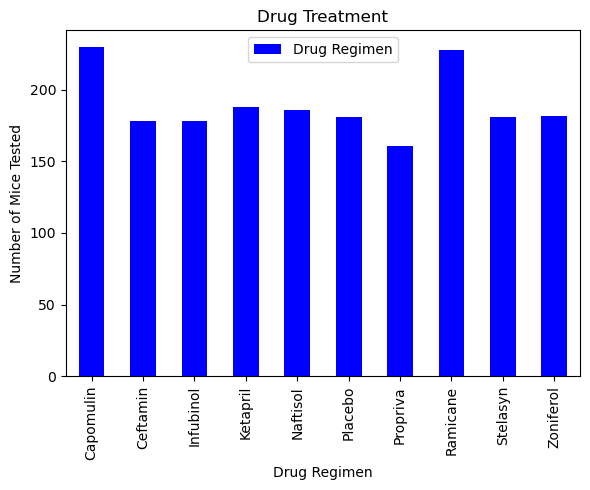

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_group = first_comb_data_df.groupby("Drug Regimen")

# count number of data points for each drug regimen and create new DataFrame
drug_group_count = pd.DataFrame(drug_group["Drug Regimen"].count())

# create bar chart to show mouse id and drug regimen
drug_group_count.plot(kind="bar", facecolor="blue", title="Drug Treatment", figsize=(6,5))
# Set textual properties and using metplotlib function
plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")
plt.tight_layout()
plt.show()


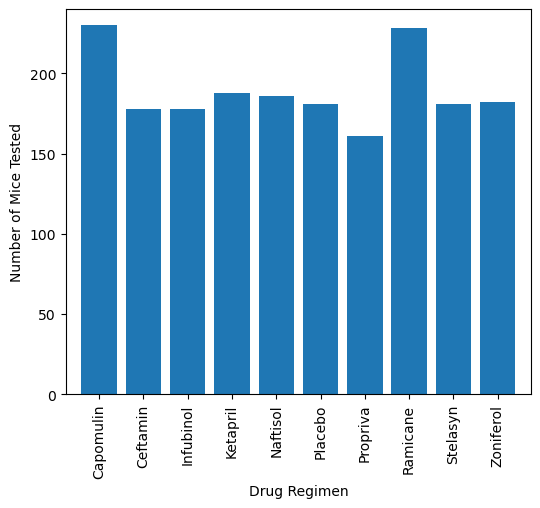

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
fig1, ax1 = plt.subplots(figsize=(6,5))
plt.bar(list(drug_group_count.index), drug_group_count["Drug Regimen"], alpha= 1) 

plt.xlim(-0.75, len(drug_group_count.index)-0.25)
plt.ylim(0, max( drug_group_count["Drug Regimen"])+10)

plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.show()


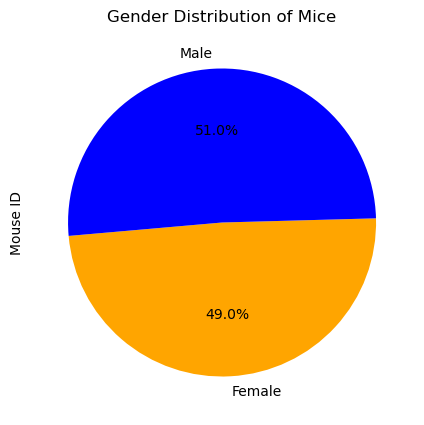

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = pd.DataFrame(clean_df.groupby(["Sex"]).count()).reset_index()
gender_data = gender_data[["Sex","Mouse ID",]]

colors = ["orange","blue"]
explode = (0.1, 0)
gender_data.plot(kind='pie', y= 'Mouse ID',colors=colors,labels=gender_data['Sex'], startangle=185, autopct='%1.1f%%', 
title="Gender Distribution of Mice", legend = False, figsize=(6,5))
plt.show()


(-1.0999998294595792,
 1.099999925840278,
 -1.0999994453787696,
 1.0999999118116914)

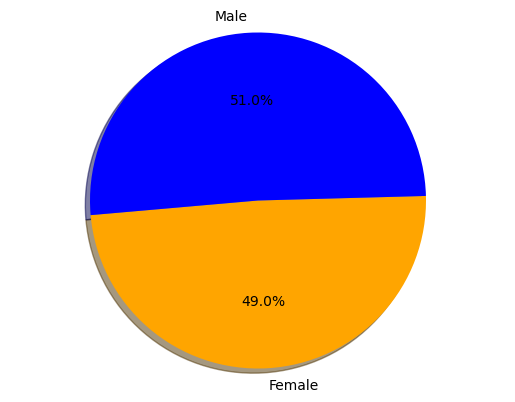

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_data = gender_data["Mouse ID"]
colors = ["orange","blue"]

plt.pie(pie_data, labels=gender_data['Sex'],colors=colors,autopct="%1.1f%%",startangle=185, shadow=True)
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [79]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint= first_comb_data_df.groupby('Mouse ID').max()['Timepoint']
max_timepoint_df = pd.DataFrame(max_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol_df = pd.merge(max_timepoint_df, clean_df, on=("Mouse ID","Timepoint"))
final_tumor_vol_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [91]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_regimens:
    tumor_by_drug = final_tumor_vol_df.loc[final_tumor_vol_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_volume.append(tumor_by_drug)
#print(tumor_volume)    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = final_tumor_vol_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    lowerq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # add subset 
    # Determine outliers using upper and lower bounds
lowerbound = lowerq - (1.5*iqr)
upperbound = upperq + (1.5*iqr)

print(f"Capomulin's potential outliers:  {lowerq}")
print(f"Ramicane's potential outliers: {lowerq}")
print(f"Infubinol's potential outliers: {lowerq}")
print(f"Name: {iqr}")
print(f"Ceftamin's potential outliers: {quartiles[0.5]} ")

Capomulin's potential outliers:  65.05362410500001
Ramicane's potential outliers: 65.05362410500001
Infubinol's potential outliers: 65.05362410500001
Name: 0.0
Ceftamin's potential outliers: 55.793278175 


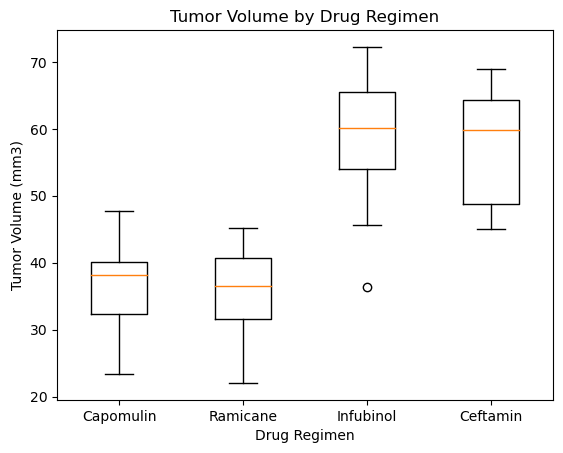

In [83]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
x = [1,2,3,4]
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_volume)
plt.xticks(x, drug_regimens)
plt.show()


## Line and Scatter Plots

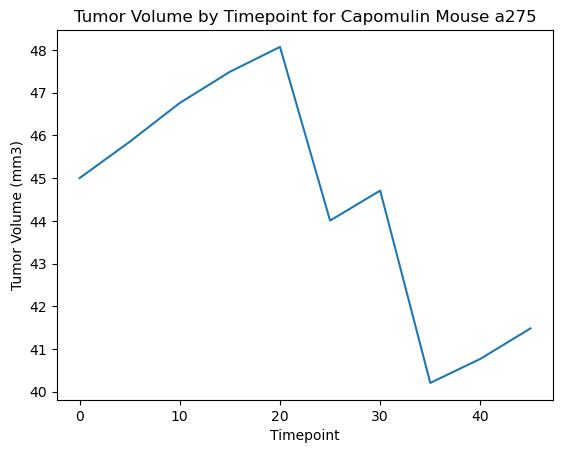

In [96]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_mouse = first_comb_data_df.loc[first_comb_data_df["Mouse ID"] == "l509"]

Capomulin_time = Capomulin_mouse["Timepoint"]
Capomulin_volume = Capomulin_mouse["Tumor Volume (mm3)"]

x_axis = np.arange(0,45,0.5)

plt.plot(Capomulin_time, Capomulin_volume)

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse a275")

plt.show()


/var/folders/k3/0l0nvb7131s4m88c4gv8x6280000gn/T/ipykernel_52959/244088475.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Average_volume = Capomulin_drug.groupby(['Mouse ID']).mean()


Text(0.5, 1.0, 'Capomulin Average Tumor Volume v Mouse Weight')

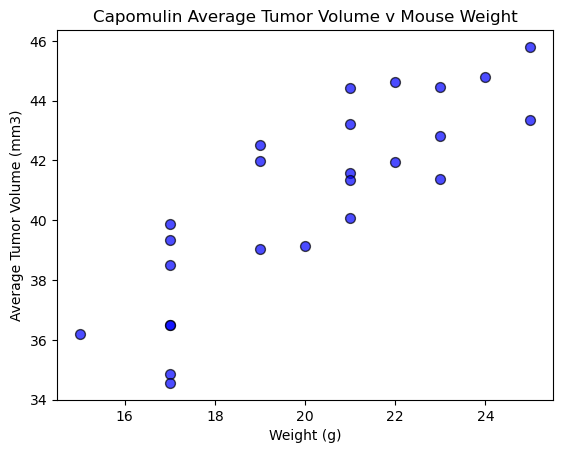

In [104]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_drug = first_comb_data_df.loc[first_comb_data_df["Drug Regimen"] == "Capomulin"]
Average_volume = Capomulin_drug.groupby(['Mouse ID']).mean()

Avg_tumor_vol = Average_volume['Tumor Volume (mm3)']
Avg_weight = Average_volume['Weight (g)']

plt.scatter(Avg_weight, Avg_tumor_vol, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.70)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Average Tumor Volume v Mouse Weight")


## Correlation and Regression

The correlation between both factors is 0.84


Text(0.5, 1.0, 'Regression by Average Mouse Weight v Average Tumor Volume')

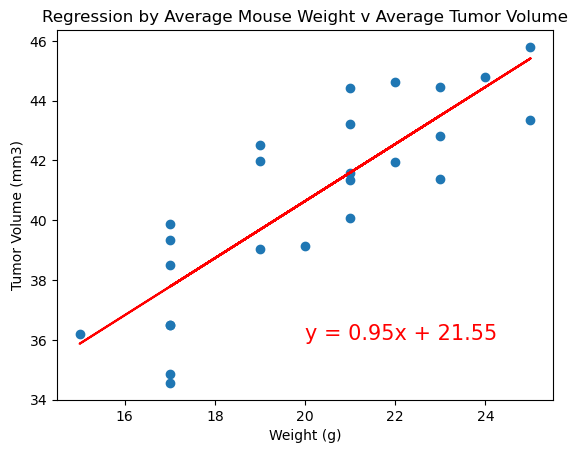

In [105]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(Avg_weight,Avg_tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(Avg_weight, Avg_tumor_vol)
#y = mx + b
regress_values = slope * Avg_weight  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(Avg_weight,Avg_tumor_vol)
plt.plot(Avg_weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Regression by Average Mouse Weight v Average Tumor Volume")
